In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, display_pretty, Javascript, HTML
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from matplotlib.backends.backend_pdf import PdfPages


# Show charts in notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# adding an empty line to test

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
# Load 2014 and 2015 survey household data
person14 = pd.read_csv(r'J:\Projects\Surveys\HHTravel\Survey2014\Data\Export\Release 3\General Release\Unzipped\2014-pr3-hhsurvey-persons.csv')
person15 = pd.read_csv(r'J:\Projects\Surveys\HHTravel\Survey2015\Data\Person\3_PSRC2015_Person_2015-07-27_v1.2.csv')

C:\Users\Brice\AppData\Local\Continuum\Anaconda\lib\site-packages\pandas\io\parsers.py:1159: DtypeWarning: Columns (107) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [5]:
# Load 2014 and 2015 survey household data
trips14 = pd.read_csv(r'J:\Projects\Surveys\HHTravel\Survey2014\Data\Export\Release 3\General Release\Unzipped\2014-pr3-hhsurvey-trips.csv')
trips15 = pd.read_csv(r'J:\Projects\Surveys\HHTravel\Survey2015\Data\Trips\4_PSRC2015_Trip_2015-07-27_v1.6.csv')

C:\Users\Brice\AppData\Local\Continuum\Anaconda\lib\site-packages\pandas\io\parsers.py:1159: DtypeWarning: Columns (6,56,57,58,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)
C:\Users\Brice\AppData\Local\Continuum\Anaconda\lib\site-packages\pandas\io\parsers.py:1159: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [6]:
# Join 2014 and 2015 datasets; creates dataframe with 14 and 15 suffixes as column names
# panel_trips = pd.merge(trips14, trips15, on='personID', suffixes=['_14','_15'])

In [7]:
# Compare 2014 to 2015


In [8]:
def add_labels(df, fields, labels):
    '''adds frequency labels for a set of like fields'''

    for field in fields:
        df[field + '_label'] = df[field]
        df[field].fillna(0,inplace=True)
        df[field + '_label'] = ([labels[x] for x in df[field]])

In [9]:
labels = {  1: "SOV",
            2: "HOV",
            3: "HOV",
            4: "SOV",
            5: "HOV",
            6: "Bicycle",
            7: "Walk",
            8: "Bus",
            9: "Train+Streetcar",
           10: "Ferry",
           11: "Train+Streetcar",
           12: "Other",
           13: "Taxi",
           14: "Other",
           15: "Private bus/shuttle",
           16: "Other",
           17: "Other",
           -99: "NA"
}

add_labels(trips15,['mode'], labels)
add_labels(trips14,['mode'], labels)

In [10]:
labels = {  1: "Home",
            2: "Work",
            3: "Work Other",
            4: "Grocery",
            5: "Shopping",
            6: "School",
            7: "Medical",
            8: "Personal Business",
            9: "Drop-off/pick-up",
           10: "Exercise",
           11: "Eat",
           12: "Social",
           13: "Recreational",
           14: "Community Event",
           15: "Transfer Mode",
           16: "Other",
           -99: "NA"
}

add_labels(trips15,['d_purpose'], labels)
add_labels(trips14,['d_purpose'], labels)

In [11]:
labels = {
    0.0: 'NA',
    1: 'Regular taxi',
    2: 'Rideshare',
    -99: 'NA'
}

add_labels(trips15,['taxi_type'], labels)
add_labels(trips14,['taxi_type'], labels)

# Mode

In [12]:
# Get the distribtion of each mode totals
mode14dist = trips14.groupby('mode_label').count()['personID']/trips14.groupby('mode_label').count()['personID'].sum()
mode15dist = trips15.groupby('mode_label').count()['personID']/trips15.groupby('mode_label').count()['personID'].sum()

df = pd.DataFrame([mode14dist, mode15dist]).T
df.columns=['2014','2015']

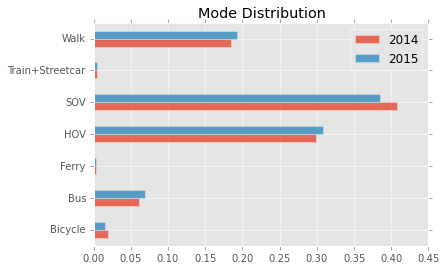

In [13]:
# Plot the distributions

# Drop some columns 
df.drop(['Taxi','Private bus/shuttle','Other','NA'],inplace=True)
plt.figure()
df.plot(kind='barh', alpha=0.8, title='Mode Distribution')

# Taxi

In [14]:
# How many taxi trips in a rideshare vehicle?
taxi14 = trips14.groupby('taxi_type_label').count()['personID']
taxi15 = trips15.groupby('taxi_type_label').count()['personID']

df = pd.DataFrame([taxi14,taxi15]).T
df.columns = ['2014','2015']
df.drop(['NA'],inplace=True)    # drop the NA responses
df['change, 14->15'] = df['2015'] - df['2014']
df.to_clipboard()

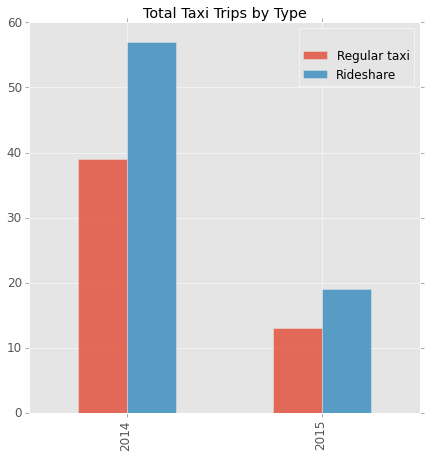

In [15]:
df.index.name = " "    # clear index name to remove as x-axis label
df = df[['2014','2015']].T
df.index.name = " "    # clear index name to remove as x-axis label
plt.figure()
df.plot(kind='bar', alpha=0.8, title='Total Taxi Trips by Type', figsize=(7,7), fontsize=12, )

In [16]:
# Show distribution too
taxi_trips14 = trips14.query('taxi_type == 1 or taxi_type == 2')
taxi_trips15 = trips15.query('taxi_type == 1 or taxi_type == 2')

taxi14 = taxi_trips14.groupby('taxi_type_label').count()['personID']/taxi_trips14.groupby('mode_label').count()['personID'].sum()
taxi15 = taxi_trips15.groupby('taxi_type_label').count()['personID']/taxi_trips15.groupby('mode_label').count()['personID'].sum()

df = pd.DataFrame([taxi14,taxi15]).T
df.columns = ['2014','2015']

In [17]:
print len(trips15.query('mode == 13'))
print len(taxi_trips15)
print "-----"
print len(trips14.query('mode == 13'))
print len(taxi_trips14)

31
32
-----
87
96


In [18]:
taxi_trips14.groupby('taxi_type_label').count()['personID']

taxi_type_label
Regular taxi       39
Rideshare          57
Name: personID, dtype: int64

In [19]:
taxi_trips15.groupby('taxi_type_label').count()['personID']

taxi_type_label
Regular taxi       13
Rideshare          19
Name: personID, dtype: int64

In [20]:
taxi_trips14.groupby('mode_label').count()['personID'].sum()

96L

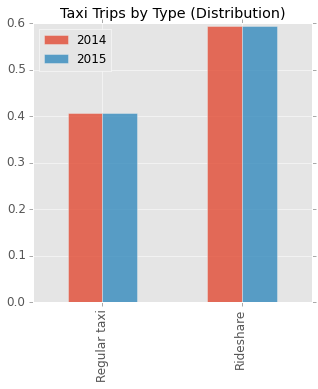

In [21]:
df.index.name = " "    # clear index name to remove as x-axis label
df = df[['2014','2015']]
df.index.name = " "    # clear index name to remove as x-axis label
plt.figure()
df.plot(kind='bar', alpha=0.8, title='Taxi Trips by Type (Distribution)', figsize=(5,5), fontsize=12, )

In [22]:
# Total number of trips is still very small, but notable increase in rideshare usage over taxi.

# Trip Purpose

In [23]:
# Get the distribtion of each mode totals
mode14dist = trips14.groupby('d_purpose_label').count()['personID']/trips14.groupby('d_purpose_label').count()['personID'].sum()
mode15dist = trips15.groupby('d_purpose_label').count()['personID']/trips15.groupby('d_purpose_label').count()['personID'].sum()

df = pd.DataFrame([mode14dist, mode15dist]).T
df.columns=['2014','2015']

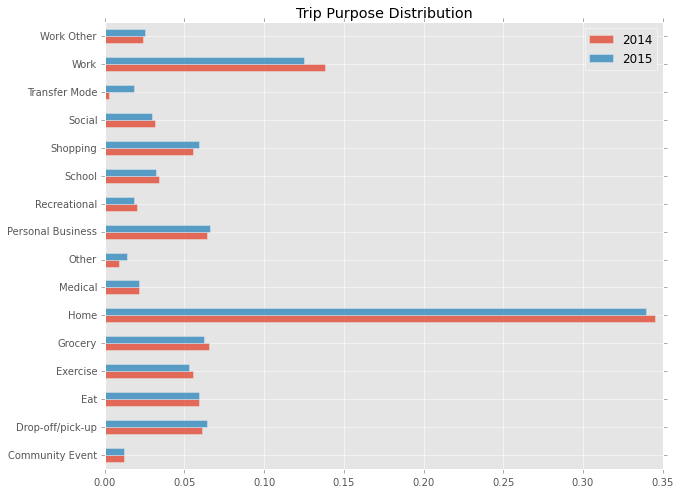

In [24]:
# Plot the distributions

df.index.name = ""    # clear index name to remove as x-axis label
plt.figure()
df.plot(kind='barh', alpha=0.8, title='Trip Purpose Distribution', figsize=(10, 8))

# Trip Characteristics

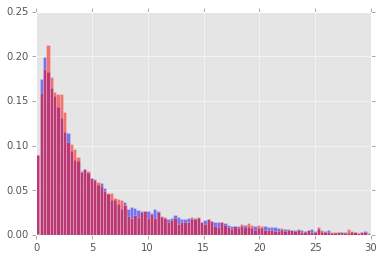

In [25]:
# Histograms of travel time 
df14 = trips14.query('mode == 1')
df15 = trips15.query('mode == 1')

# SOV
plt.figure()

# Normalized histogram
(df14.query('0 < gdist < 30'))['gdist'].hist(color='b', alpha=0.5, bins=100, normed=True)
(df15.query('0 < gdist < 30'))['gdist'].hist(color='r', alpha=0.5, bins=100, normed=True)

In [26]:
# Bike

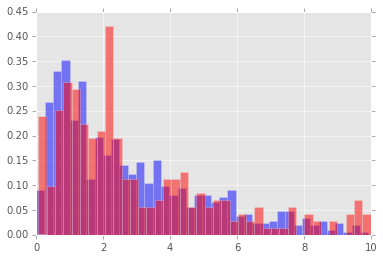

In [27]:
# Histograms of travel time 
df14 = trips14.query('mode == 6')
df15 = trips15.query('mode == 6')
plt.figure()

# Normalized histogram
(df14.query('0 < gdist < 10'))['gdist'].hist(color='b', alpha=0.5, bins=40, normed=True)
(df15.query('0 < gdist < 10'))['gdist'].hist(color='r', alpha=0.5, bins=40, normed=True)

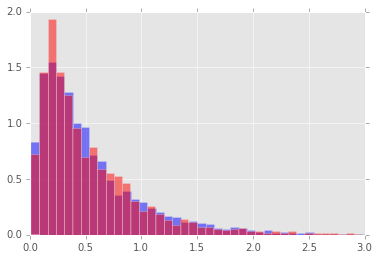

In [29]:
# Walk
# Histograms of travel time 
df14 = trips14.query('mode == 7')
df15 = trips15.query('mode == 7')

# SOV
plt.figure()

# Normalized histogram
(df14.query('0 < gdist < 3'))['gdist'].hist(color='b', alpha=0.5, bins=40, normed=True)
(df15.query('0 < gdist < 3'))['gdist'].hist(color='r', alpha=0.5, bins=40, normed=True)

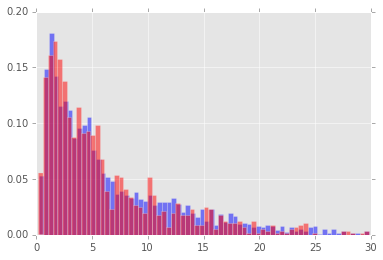

In [30]:
# Bus
df14 = trips14.query('mode == 8')
df15 = trips15.query('mode == 8')

# SOV
plt.figure()

# Normalized histogram
(df14.query('0 < gdist < 30'))['gdist'].hist(color='b', alpha=0.5, bins=70, normed=True)
(df15.query('0 < gdist < 30'))['gdist'].hist(color='r', alpha=0.5, bins=70, normed=True)

# Transit Ridership

In [31]:
# Find households who rode lines that were affected by KC Metro cuts in late 2014

In [32]:
deleted_routes = [7,19,47,48,61,62,139,152,161,173,202,203,205,209,210,211,213,215,
                 243,250,260,265,280,306,909,919,927,935]
revised_routes = [24,27,30,33,48,178,200,201,204,208,212,236,238,249,312,331,903,931]

In [33]:
# People who used deleted routes in 2014

# find trips using these routes
df14 = trips14[trips14['transitline1'].isin(deleted_routes)]

# get household id for those using these routes in 2014
hh_del_routes_2014 = df14.groupby('hhid').count().index

In [34]:
len(hh_del_routes_2014)

81

In [81]:
# Show mode share for these households
# First get trip records for these households
del_routes_trips_2014 = trips14[trips14['hhid'].isin(hh_del_routes_2014)]
del_routes_trips_2015 = trips15[trips15['hhid'].isin(hh_del_routes_2014)]

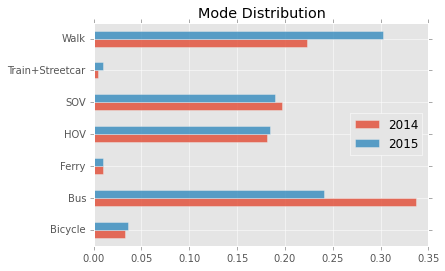

In [71]:
# Mode share for these households
# Get the distribtion of each mode totals
mode14dist = del_routes_trips_2014.groupby('mode_label').count()['personID']/del_routes_trips_2014.groupby('mode_label').count()['personID'].sum()
mode15dist = del_routes_trips_2015.groupby('mode_label').count()['personID']/del_routes_trips_2015.groupby('mode_label').count()['personID'].sum()

df = pd.DataFrame([mode14dist, mode15dist]).T
df.columns=['2014','2015']

# Plot the distributions

# Drop some columns 
df.drop(['Taxi','Private bus/shuttle','Other','NA'],inplace=True)
plt.figure()
df.plot(kind='barh', alpha=0.8, title='Mode Distribution')

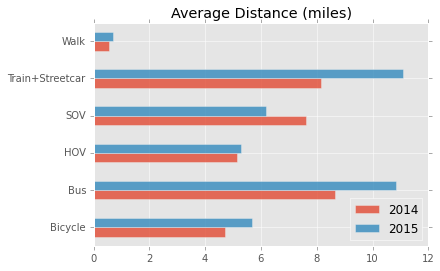

In [72]:
# Look at the average trip lengths by mode, before and after
avg_dist_14 = del_routes_trips_2014.groupby('mode_label').mean()['gdist']
avg_dist_15 = del_routes_trips_2015.groupby('mode_label').mean()['gdist']

df = pd.DataFrame([avg_dist_14, avg_dist_15]).T
df.columns=['2014','2015']

# Plot the distributions

# Drop some columns 
df.drop(['Taxi','Private bus/shuttle','Other','NA', 'Ferry'],inplace=True)
plt.figure()
df.plot(kind='barh', alpha=0.8, title='Average Distance (miles)')

## How many more transfers occured in 2015 v 2014?

Note: this won't be accurate until trips are linked

In [77]:
# fill na
del_routes_trips_2014.fillna(0,inplace=True)
del_routes_trips_2015.fillna(0,inplace=True)
# del_routes_trips_2014['transfers'] = 

C:\Users\Brice\AppData\Local\Continuum\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Brice\AppData\Local\Continuum\Anaconda\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [39]:
# total transfers occuring
transfers14 = np.count_nonzero(del_routes_trips_2014['transitline2'])+\
np.count_nonzero(del_routes_trips_2014['transitline3'])+\
np.count_nonzero(del_routes_trips_2014['transitline4'])

In [40]:
transfers15 = np.count_nonzero(del_routes_trips_2015['transitline2'])+\
np.count_nonzero(del_routes_trips_2015['transitline3'])+\
np.count_nonzero(del_routes_trips_2015['transitline4'])

In [41]:
print transfers14
print transfers15

68
5


In [42]:
transit_trips_14 = del_routes_trips_2014.query('mode in [8,9,10,11]').count()['hhid'].astype('float')
transit_trips_15 = del_routes_trips_2015.query('mode in [8,9,10,11]').count()['hhid'].astype('float')

In [43]:
print transit_trips_14
print transit_trips_15

223.0
51.0


In [44]:
# Transfers per transit trips
print '2014: '+ str(transfers14/transit_trips_14)
print '2015: '+ str(transfers15/transit_trips_15)

2014: 0.304932735426
2015: 0.0980392156863


In [45]:
del_routes_trips_2014.query('mode in [8,9,10,11]').count()['hhid'].astype('float')

223.0

In [47]:
np.count_nonzero(del_routes_trips_2015['transitline2'])

5

In [60]:
del_routes_trips_2014.count()['hhid']

635

In [66]:
len(unique(del_routes_trips_2014['hhid']))

81

## Average trips per households

In [68]:
# Average trips per household 2014
del_routes_trips_2014.count()['hhid'].astype('float')/len(unique(del_routes_trips_2014['hhid']))

7.8395061728395063

In [69]:
# Average trips per household 2015
del_routes_trips_2015.count()['hhid'].astype('float')/len(unique(del_routes_trips_2015['hhid']))

8.8636363636363633